# FLood Forecasting


## Data Acquisition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

In [2]:
IPython_default = plt.rcParams.copy()

from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [3]:
data = pd.read_csv('dataset/barrages.csv')
data

,Nom_Fr,Nom_Ar,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,...,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Latitude,Longitude,Bassin_versant,Date
0,mellegue,مـــــلاق,0.000000,1,0.020000,15.00490,0.000000,12.089900,0.080000,2.751000,...,15.33540,51.1300,265.00,267.670,1.0,1954,36.3144,8.70273,10300.0,2022-01-04 00:00:00
1,sarrat,سراط,0.017185,36,0.030790,8.24096,0.020632,6.575540,0.030790,2.826050,...,NaN,21.0000,546.00,21.000,1.0,2016,49.9167,26.58330,1850.0,2022-01-04 00:00:00
2,benmetir,بنيمطيــر,0.000000,2,0.060480,14.17400,0.000000,9.558420,0.241920,3.556370,...,22.99180,60.3930,436.50,61.630,1.0,1954,36.7471,8.74188,103.0,2022-01-04 00:00:00
3,kasseb,كســاب,0.013746,3,0.077760,27.29380,0.187218,13.459800,0.311040,10.506200,...,36.92230,76.9000,292.04,81.875,1.0,1968,36.7614,9.00230,101.0,2022-01-04 00:00:00
4,barbara,بربرة,0.006268,4,0.000000,47.11490,0.086872,22.255000,0.000000,13.771100,...,64.29710,64.7000,182.00,74.820,1.0,1998,36.7341,8.53173,177.0,2022-01-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,chiba,شيبـــــــة,0.000000,26,0.006135,1.19516,0.004232,0.229886,0.006135,0.389222,...,1.45716,5.0450,77.88,7.800,1.0,1963,36.6923,10.76970,64.0,2021-01-06 00:00:00
12834,masri,مصــــــري,0.004264,27,0.271210,4.80683,0.010221,0.398728,0.335020,1.385210,...,4.79142,5.1930,163.00,6.900,1.0,1968,36.5340,10.49110,53.0,2021-01-06 00:00:00
12835,lebna,لبنــــــــة,0.005648,28,0.001210,12.61170,0.023841,2.402410,0.005800,0.660983,...,22.48180,23.3053,18.04,30.100,1.0,1986,36.7388,10.92180,199.0,2021-01-06 00:00:00
12836,hma,الحمـــــى,0.000708,29,0.000000,2.19034,0.003415,1.682970,0.000000,0.017334,...,2.03120,12.8540,102.40,12.100,1.0,2002,36.5874,10.30400,123.0,2021-01-06 00:00:00


## Data Cleaning

Defining the columns

In [4]:
df = pd.DataFrame(data, columns = ['Nom_Fr','Nom_Ar','apports','id_barrage','lachers','stock','cumul_mensuel_apports','cumul_annuel_apports','cumul_mensuel_lachers','cumul_annuel_lachers','moy_mois','cumul_annee_prec','moy_periode','stock_annee_prec','Cap_tot_act','Cote','Cap_tot_init','fonctionnel','Annee_prod','Latitude','Longitude','Bassin_versant','Date'])
df

,Nom_Fr,Nom_Ar,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,...,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Latitude,Longitude,Bassin_versant,Date
0,mellegue,مـــــلاق,0.000000,1,0.020000,15.00490,0.000000,12.089900,0.080000,2.751000,...,15.33540,51.1300,265.00,267.670,1.0,1954,36.3144,8.70273,10300.0,2022-01-04 00:00:00
1,sarrat,سراط,0.017185,36,0.030790,8.24096,0.020632,6.575540,0.030790,2.826050,...,NaN,21.0000,546.00,21.000,1.0,2016,49.9167,26.58330,1850.0,2022-01-04 00:00:00
2,benmetir,بنيمطيــر,0.000000,2,0.060480,14.17400,0.000000,9.558420,0.241920,3.556370,...,22.99180,60.3930,436.50,61.630,1.0,1954,36.7471,8.74188,103.0,2022-01-04 00:00:00
3,kasseb,كســاب,0.013746,3,0.077760,27.29380,0.187218,13.459800,0.311040,10.506200,...,36.92230,76.9000,292.04,81.875,1.0,1968,36.7614,9.00230,101.0,2022-01-04 00:00:00
4,barbara,بربرة,0.006268,4,0.000000,47.11490,0.086872,22.255000,0.000000,13.771100,...,64.29710,64.7000,182.00,74.820,1.0,1998,36.7341,8.53173,177.0,2022-01-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,chiba,شيبـــــــة,0.000000,26,0.006135,1.19516,0.004232,0.229886,0.006135,0.389222,...,1.45716,5.0450,77.88,7.800,1.0,1963,36.6923,10.76970,64.0,2021-01-06 00:00:00
12834,masri,مصــــــري,0.004264,27,0.271210,4.80683,0.010221,0.398728,0.335020,1.385210,...,4.79142,5.1930,163.00,6.900,1.0,1968,36.5340,10.49110,53.0,2021-01-06 00:00:00
12835,lebna,لبنــــــــة,0.005648,28,0.001210,12.61170,0.023841,2.402410,0.005800,0.660983,...,22.48180,23.3053,18.04,30.100,1.0,1986,36.7388,10.92180,199.0,2021-01-06 00:00:00
12836,hma,الحمـــــى,0.000708,29,0.000000,2.19034,0.003415,1.682970,0.000000,0.017334,...,2.03120,12.8540,102.40,12.100,1.0,2002,36.5874,10.30400,123.0,2021-01-06 00:00:00


In [5]:
# check the data type of data frame "df" by .dtypes
print(df.dtypes)

Nom_Fr                    object
Nom_Ar                    object
apports                  float64
id_barrage                 int64
lachers                  float64
stock                    float64
cumul_mensuel_apports    float64
cumul_annuel_apports     float64
cumul_mensuel_lachers    float64
cumul_annuel_lachers     float64
moy_mois                 float64
cumul_annee_prec         float64
moy_periode              float64
stock_annee_prec         float64
Cap_tot_act              float64
Cote                     float64
Cap_tot_init             float64
fonctionnel              float64
Annee_prod                 int64
Latitude                 float64
Longitude                float64
Bassin_versant           float64
Date                      object
dtype: object


drop nom_ar column because we don't need the arabic version of the name

In [6]:
df=df.drop('Nom_Ar',1)
df

,Nom_Fr,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,moy_mois,...,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Latitude,Longitude,Bassin_versant,Date
0,mellegue,0.000000,1,0.020000,15.00490,0.000000,12.089900,0.080000,2.751000,12.578500,...,15.33540,51.1300,265.00,267.670,1.0,1954,36.3144,8.70273,10300.0,2022-01-04 00:00:00
1,sarrat,0.017185,36,0.030790,8.24096,0.020632,6.575540,0.030790,2.826050,0.775000,...,NaN,21.0000,546.00,21.000,1.0,2016,49.9167,26.58330,1850.0,2022-01-04 00:00:00
2,benmetir,0.000000,2,0.060480,14.17400,0.000000,9.558420,0.241920,3.556370,9.809260,...,22.99180,60.3930,436.50,61.630,1.0,1954,36.7471,8.74188,103.0,2022-01-04 00:00:00
3,kasseb,0.013746,3,0.077760,27.29380,0.187218,13.459800,0.311040,10.506200,8.238380,...,36.92230,76.9000,292.04,81.875,1.0,1968,36.7614,9.00230,101.0,2022-01-04 00:00:00
4,barbara,0.006268,4,0.000000,47.11490,0.086872,22.255000,0.000000,13.771100,18.461400,...,64.29710,64.7000,182.00,74.820,1.0,1998,36.7341,8.53173,177.0,2022-01-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,chiba,0.000000,26,0.006135,1.19516,0.004232,0.229886,0.006135,0.389222,1.110560,...,1.45716,5.0450,77.88,7.800,1.0,1963,36.6923,10.76970,64.0,2021-01-06 00:00:00
12834,masri,0.004264,27,0.271210,4.80683,0.010221,0.398728,0.335020,1.385210,0.629791,...,4.79142,5.1930,163.00,6.900,1.0,1968,36.5340,10.49110,53.0,2021-01-06 00:00:00
12835,lebna,0.005648,28,0.001210,12.61170,0.023841,2.402410,0.005800,0.660983,3.680890,...,22.48180,23.3053,18.04,30.100,1.0,1986,36.7388,10.92180,199.0,2021-01-06 00:00:00
12836,hma,0.000708,29,0.000000,2.19034,0.003415,1.682970,0.000000,0.017334,0.402662,...,2.03120,12.8540,102.40,12.100,1.0,2002,36.5874,10.30400,123.0,2021-01-06 00:00:00


In [7]:
df.drop_duplicates(keep=False,inplace=True)
df

,Nom_Fr,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,moy_mois,...,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Latitude,Longitude,Bassin_versant,Date
0,mellegue,0.000000,1,0.020000,15.00490,0.000000,12.089900,0.080000,2.751000,12.578500,...,15.33540,51.1300,265.00,267.670,1.0,1954,36.3144,8.70273,10300.0,2022-01-04 00:00:00
1,sarrat,0.017185,36,0.030790,8.24096,0.020632,6.575540,0.030790,2.826050,0.775000,...,NaN,21.0000,546.00,21.000,1.0,2016,49.9167,26.58330,1850.0,2022-01-04 00:00:00
2,benmetir,0.000000,2,0.060480,14.17400,0.000000,9.558420,0.241920,3.556370,9.809260,...,22.99180,60.3930,436.50,61.630,1.0,1954,36.7471,8.74188,103.0,2022-01-04 00:00:00
3,kasseb,0.013746,3,0.077760,27.29380,0.187218,13.459800,0.311040,10.506200,8.238380,...,36.92230,76.9000,292.04,81.875,1.0,1968,36.7614,9.00230,101.0,2022-01-04 00:00:00
4,barbara,0.006268,4,0.000000,47.11490,0.086872,22.255000,0.000000,13.771100,18.461400,...,64.29710,64.7000,182.00,74.820,1.0,1998,36.7341,8.53173,177.0,2022-01-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,chiba,0.000000,26,0.006135,1.19516,0.004232,0.229886,0.006135,0.389222,1.110560,...,1.45716,5.0450,77.88,7.800,1.0,1963,36.6923,10.76970,64.0,2021-01-06 00:00:00
12834,masri,0.004264,27,0.271210,4.80683,0.010221,0.398728,0.335020,1.385210,0.629791,...,4.79142,5.1930,163.00,6.900,1.0,1968,36.5340,10.49110,53.0,2021-01-06 00:00:00
12835,lebna,0.005648,28,0.001210,12.61170,0.023841,2.402410,0.005800,0.660983,3.680890,...,22.48180,23.3053,18.04,30.100,1.0,1986,36.7388,10.92180,199.0,2021-01-06 00:00:00
12836,hma,0.000708,29,0.000000,2.19034,0.003415,1.682970,0.000000,0.017334,0.402662,...,2.03120,12.8540,102.40,12.100,1.0,2002,36.5874,10.30400,123.0,2021-01-06 00:00:00


In [8]:
pd.options.display.float_format = "{:,.2f}".format
print(df)

         Nom_Fr  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
0      mellegue     0.00           1     0.02  15.00                   0.00   
1        sarrat     0.02          36     0.03   8.24                   0.02   
2      benmetir     0.00           2     0.06  14.17                   0.00   
3        kasseb     0.01           3     0.08  27.29                   0.19   
4       barbara     0.01           4     0.00  47.11                   0.09   
...         ...      ...         ...      ...    ...                    ...   
12833     chiba     0.00          26     0.01   1.20                   0.00   
12834     masri     0.00          27     0.27   4.81                   0.01   
12835     lebna     0.01          28     0.00  12.61                   0.02   
12836       hma     0.00          29     0.00   2.19                   0.00   
12837      abid     0.00          30     0.00   4.14                   0.00   

       cumul_annuel_apports  cumul_mensuel_lachers 

drop the latitude and longitude columns becuase we do not need the geographical coordinations of the dam

In [9]:
df=df.drop('Latitude',1)
print(df)

         Nom_Fr  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
0      mellegue     0.00           1     0.02  15.00                   0.00   
1        sarrat     0.02          36     0.03   8.24                   0.02   
2      benmetir     0.00           2     0.06  14.17                   0.00   
3        kasseb     0.01           3     0.08  27.29                   0.19   
4       barbara     0.01           4     0.00  47.11                   0.09   
...         ...      ...         ...      ...    ...                    ...   
12833     chiba     0.00          26     0.01   1.20                   0.00   
12834     masri     0.00          27     0.27   4.81                   0.01   
12835     lebna     0.01          28     0.00  12.61                   0.02   
12836       hma     0.00          29     0.00   2.19                   0.00   
12837      abid     0.00          30     0.00   4.14                   0.00   

       cumul_annuel_apports  cumul_mensuel_lachers 

In [10]:
df=df.drop('Longitude',1)
print(df)

         Nom_Fr  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
0      mellegue     0.00           1     0.02  15.00                   0.00   
1        sarrat     0.02          36     0.03   8.24                   0.02   
2      benmetir     0.00           2     0.06  14.17                   0.00   
3        kasseb     0.01           3     0.08  27.29                   0.19   
4       barbara     0.01           4     0.00  47.11                   0.09   
...         ...      ...         ...      ...    ...                    ...   
12833     chiba     0.00          26     0.01   1.20                   0.00   
12834     masri     0.00          27     0.27   4.81                   0.01   
12835     lebna     0.01          28     0.00  12.61                   0.02   
12836       hma     0.00          29     0.00   2.19                   0.00   
12837      abid     0.00          30     0.00   4.14                   0.00   

       cumul_annuel_apports  cumul_mensuel_lachers 

In [11]:
df= df.rename(columns={'Nom_Fr': 'station'})
df

,station,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,moy_mois,cumul_annee_prec,moy_periode,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Bassin_versant,Date
0,mellegue,0.00,1,0.02,15.00,0.00,12.09,0.08,2.75,12.58,26.33,86.85,15.34,51.13,265.00,267.67,1.00,1954,"10,300.00",2022-01-04 00:00:00
1,sarrat,0.02,36,0.03,8.24,0.02,6.58,0.03,2.83,0.78,NaN,8.85,NaN,21.00,546.00,21.00,1.00,2016,"1,850.00",2022-01-04 00:00:00
2,benmetir,0.00,2,0.06,14.17,0.00,9.56,0.24,3.56,9.81,8.29,11.35,22.99,60.39,436.50,61.63,1.00,1954,103.00,2022-01-04 00:00:00
3,kasseb,0.01,3,0.08,27.29,0.19,13.46,0.31,10.51,8.24,12.01,12.38,36.92,76.90,292.04,81.88,1.00,1968,101.00,2022-01-04 00:00:00
4,barbara,0.01,4,0.00,47.11,0.09,22.25,0.00,13.77,18.46,24.35,24.14,64.30,64.70,182.00,74.82,1.00,1998,177.00,2022-01-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,chiba,0.00,26,0.01,1.20,0.00,0.23,0.01,0.39,1.11,1.50,3.13,1.46,5.04,77.88,7.80,1.00,1963,64.00,2021-01-06 00:00:00
12834,masri,0.00,27,0.27,4.81,0.01,0.40,0.34,1.39,0.63,0.47,2.14,4.79,5.19,163.00,6.90,1.00,1968,53.00,2021-01-06 00:00:00
12835,lebna,0.01,28,0.00,12.61,0.02,2.40,0.01,0.66,3.68,18.31,8.02,22.48,23.31,18.04,30.10,1.00,1986,199.00,2021-01-06 00:00:00
12836,hma,0.00,29,0.00,2.19,0.00,1.68,0.00,0.02,0.40,0.28,2.64,2.03,12.85,102.40,12.10,1.00,2002,123.00,2021-01-06 00:00:00


In [12]:
df.to_csv('cleanedbarrage.csv')


## Data Visualization

In [13]:
currentstock_perdam = df['stock'].groupby(df['station'])
print(currentstock_perdam.mean())

station
abid           2.92
barbara       52.33
benmetir      16.71
bezirk         1.58
birmcherga    27.84
bouheurtma    26.84
chiba          0.74
elbrek         0.09
elhaouareb     0.39
gamgoum       17.58
ghezala        5.77
harka         29.00
hma            1.40
joumine       39.98
kasseb        31.13
kebir          5.84
lakhmess       2.02
lebna          8.58
masri          4.12
melah          8.83
mellegue      10.54
moula         25.80
nebhana        4.08
rmel           2.67
rmil           0.91
sarrat         6.39
sejnane       98.89
selbarrak    241.17
sficifa        1.74
sidiach        2.06
sidisaad      40.40
sidisalem    200.97
siliana        5.43
tine           6.07
zarga         15.87
ziatine       22.68
Name: stock, dtype: float64


In [14]:
predstock_perdam = df['stock_annee_prec'].groupby(df['station'])
print(predstock_perdam.mean())

station
abid           6.01
barbara       57.44
benmetir      31.08
bezirk         2.79
birmcherga    32.81
bouheurtma    39.04
chiba          0.63
elbrek         1.02
elhaouareb     1.13
gamgoum       17.39
ghezala        6.50
harka           NaN
hma            1.51
joumine       41.35
kasseb        43.35
kebir          6.22
lakhmess       3.98
lebna         17.24
masri          4.42
melah         20.97
mellegue      20.80
moula         25.68
nebhana       10.56
rmel           6.78
rmil           1.05
sarrat          NaN
sejnane       92.08
selbarrak    237.16
sficifa        1.56
sidiach        3.77
sidisaad      55.07
sidisalem    359.03
siliana       14.17
tine          10.08
zarga         18.93
ziatine       25.75
Name: stock_annee_prec, dtype: float64


### Sidisalem

         station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
5      sidisalem     0.13           5     0.35 127.37                   1.37   
41     sidisalem     0.34           5     0.35 127.58                   1.24   
77     sidisalem     0.34           5     0.35 127.58                   0.90   
113    sidisalem     0.56           5     0.35 127.58                   0.56   
149    sidisalem     0.34           5     0.35 127.37                  42.27   
...          ...      ...         ...      ...    ...                    ...   
12672  sidisalem     0.57           5     0.04 265.93                   8.77   
12706  sidisalem     0.28           5     0.04 265.34                   8.19   
12740  sidisalem     0.57           5     0.04 265.05                   7.91   
12774  sidisalem     0.86           5     0.04 264.47                   7.34   
12808  sidisalem     0.28           5     0.04 263.59                   6.48   

       cumul_annuel_apports  cumul_mens

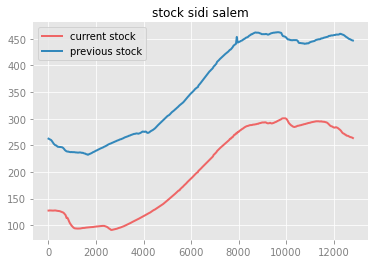

In [15]:
dfsidisalem= df[df['station']=='sidisalem']
print(dfsidisalem)

stocksidisalem= pd.DataFrame()
stocksidisalem['current stock']=dfsidisalem['stock']
stocksidisalem['previous stock']=dfsidisalem['stock_annee_prec']
print(stocksidisalem)

stocksidisalem.plot()

dfsidisalem.to_csv('dfsidisalem.csv')
plt.title('stock sidi salem')
plt.savefig('dfsidisalem.png')

### Sejnane

       station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
11     sejnane     0.24           9     0.75 121.79                   0.80   
47     sejnane     0.17           9     0.75 122.30                   0.56   
83     sejnane     0.16           9     0.75 122.88                   0.39   
119    sejnane     0.23           9     0.75 123.47                   0.23   
155    sejnane     0.09           9     0.75 123.99                  44.57   
...        ...      ...         ...      ...    ...                    ...   
12678  sejnane     0.00           9     0.18 106.34                   2.86   
12712  sejnane     0.11           9     0.10 106.54                   2.86   
12746  sejnane     0.11           9     0.10 106.54                   2.76   
12780  sejnane     0.11           9     0.10 106.54                   2.65   
12814  sejnane     0.11           9     0.10 106.54                   2.54   

       cumul_annuel_apports  cumul_mensuel_lachers  cumul_annue

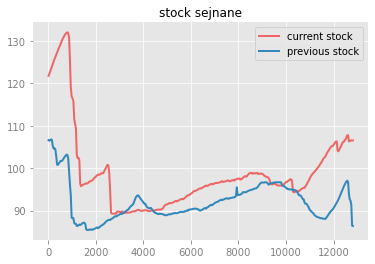

In [26]:
dfsejnane= df[df['station']=='sejnane']
print(dfsejnane)

stocksejnane= pd.DataFrame()
stocksejnane['current stock']=dfsejnane['stock']
stocksejnane['previous stock']=dfsejnane['stock_annee_prec']
print(stocksejnane)

stocksejnane.plot()
dfsejnane.to_csv('dfsejnane.csv')

plt.title('stock sejnane')
plt.savefig('dfsejnane.png')

### Joumine

       station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
7      joumine     0.11           7     0.10  51.13                   0.49   
43     joumine     0.14           7     0.10  51.13                   0.39   
79     joumine     0.11           7     0.10  51.09                   0.25   
115    joumine     0.14           7     0.10  51.09                   0.14   
151    joumine     0.11           7     0.10  51.05                  27.05   
...        ...      ...         ...      ...    ...                    ...   
12674  joumine     0.15           7     0.01  40.50                   1.97   
12708  joumine     0.11           7     0.01  40.37                   1.82   
12742  joumine     0.18           7     0.01  40.26                   1.71   
12776  joumine     0.14           7     0.01  40.09                   1.53   
12810  joumine     0.21           7     0.01  39.96                   1.39   

       cumul_annuel_apports  cumul_mensuel_lachers  cumul_annue

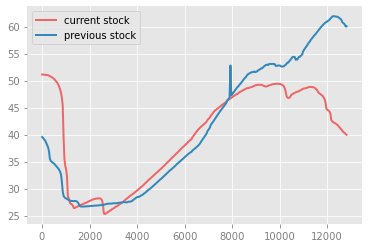

In [17]:
dfjoumine= df[df['station']=='joumine']
print(dfjoumine)

stockjoumine= pd.DataFrame()
stockjoumine['current stock']=dfjoumine['stock']
stockjoumine['previous stock']=dfjoumine['stock_annee_prec']
print(stockjoumine)

stockjoumine.plot()

dfjoumine.to_csv('dfjoumine.csv')

### Siliana

       station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
19     siliana     0.00          14     0.00   2.75                   0.01   
55     siliana     0.00          14     0.00   2.75                   0.01   
91     siliana     0.00          14     0.00   2.75                   0.01   
127    siliana     0.00          14     0.00   2.75                   0.00   
163    siliana     0.00          14     0.00   2.75                   0.16   
...        ...      ...         ...      ...    ...                    ...   
12685  siliana     0.04          14     0.00  10.60                   0.36   
12719  siliana     0.01          14     0.00  10.57                   0.32   
12753  siliana     0.04          14     0.00  10.57                   0.31   
12787  siliana     0.04          14     0.00  10.53                   0.27   
12821  siliana     0.04          14     0.00  10.50                   0.23   

       cumul_annuel_apports  cumul_mensuel_lachers  cumul_annue

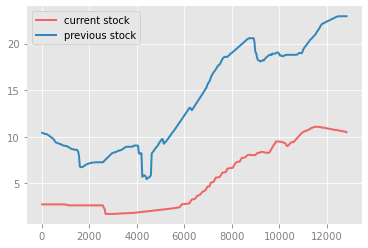

In [18]:
dfsiliana= df[df['station']=='siliana']
print(dfsiliana)

stocksiliana= pd.DataFrame()
stocksiliana['current stock']=dfsiliana['stock']
stocksiliana['previous stock']=dfsiliana['stock_annee_prec']
print(stocksiliana)

stocksiliana.plot()

dfsiliana.to_csv('dfsiliana.csv')

### Birmcherga

          station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
22     birmcherga     0.01          17     0.00  22.15                   0.03   
58     birmcherga     0.01          17     0.00  22.15                   0.02   
94     birmcherga     0.01          17     0.00  22.15                   0.02   
130    birmcherga     0.01          17     0.00  22.15                   0.01   
166    birmcherga     0.01          17     0.00  22.15                   0.86   
...           ...      ...         ...      ...    ...                    ...   
12688  birmcherga     0.01          17     0.00  33.26                   0.07   
12722  birmcherga     0.00          17     0.00  33.26                   0.06   
12756  birmcherga     0.01          17     0.00  33.32                   0.06   
12790  birmcherga     0.01          17     0.00  33.32                   0.05   
12824  birmcherga     0.01          17     0.00  33.32                   0.05   

       cumul_annuel_apports

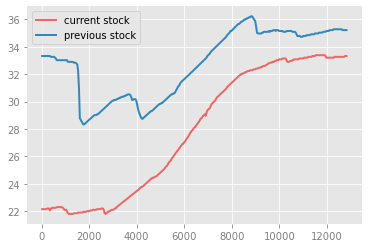

In [19]:
dfbirmcherga= df[df['station']=='birmcherga']
print(dfbirmcherga)

stockbirmcherga= pd.DataFrame()
stockbirmcherga['current stock']=dfbirmcherga['stock']
stockbirmcherga['previous stock']=dfbirmcherga['stock_annee_prec']
print(stockbirmcherga)

stockbirmcherga.plot()

dfbirmcherga.to_csv('dfbirmcherga.csv')

### Bouheurtma

          station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
6      bouheurtma     0.02           6     0.02  26.84                   0.20   
42     bouheurtma     0.06           6     0.02  26.84                   0.18   
78     bouheurtma     0.06           6     0.02  26.80                   0.12   
114    bouheurtma     0.06           6     0.02  26.76                   0.06   
150    bouheurtma     0.02           6     0.02  26.73                  10.93   
...           ...      ...         ...      ...    ...                    ...   
12673  bouheurtma     0.09           6     0.09  30.56                   1.20   
12707  bouheurtma     0.11           6     0.19  30.56                   1.10   
12741  bouheurtma     0.08           6     0.08  30.64                   0.99   
12775  bouheurtma     0.13           6     0.17  30.64                   0.91   
12809  bouheurtma     0.11           6     0.03  30.68                   0.78   

       cumul_annuel_apports

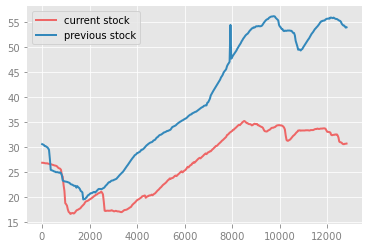

In [20]:
dfbouheurtma= df[df['station']=='bouheurtma']
print(dfbouheurtma)

stockbouheurtma= pd.DataFrame()
stockbouheurtma['current stock']=dfbouheurtma['stock']
stockbouheurtma['previous stock']=dfbouheurtma['stock_annee_prec']
print(stockbouheurtma)

stockbouheurtma.plot()

dfbouheurtma.to_csv('dfbouheurtma.csv')

### Hma

      station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
34        hma     0.00          29     0.00   0.73                   0.00   
70        hma     0.00          29     0.00   0.73                   0.00   
106       hma     0.00          29     0.00   0.73                   0.00   
142       hma     0.00          29     0.00   0.74                   0.00   
178       hma     0.00          29     0.00   0.74                   0.02   
...       ...      ...         ...      ...    ...                    ...   
12700     hma     0.00          29     0.00   2.19                   0.01   
12734     hma     0.00          29     0.00   2.19                   0.01   
12768     hma     0.00          29     0.00   2.19                   0.00   
12802     hma     0.00          29     0.00   2.19                   0.00   
12836     hma     0.00          29     0.00   2.19                   0.00   

       cumul_annuel_apports  cumul_mensuel_lachers  cumul_annuel_lachers  \

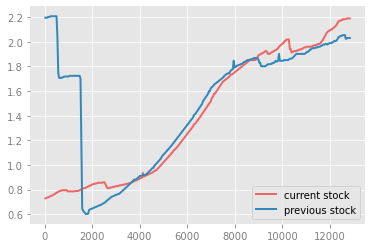

In [21]:
dfhma= df[df['station']=='hma']
print(dfhma)

stockhma= pd.DataFrame()
stockhma['current stock']=dfhma['stock']
stockhma['previous stock']=dfhma['stock_annee_prec']
print(stockhma)

stockhma.plot()

dfhma.to_csv('dfhma.csv')

### Mellegue

        station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
0      mellegue     0.00           1     0.02  15.00                   0.00   
36     mellegue     0.00           1     0.02  15.03                   0.00   
72     mellegue     0.00           1     0.02  15.06                   0.00   
108    mellegue     0.00           1     0.02  15.13                   0.00   
144    mellegue     0.00           1     0.02  15.16                   1.89   
...         ...      ...         ...      ...    ...                    ...   
12668  mellegue     0.06           1     0.09  15.06                   0.34   
12702  mellegue     0.03           1     0.09  15.10                   0.28   
12736  mellegue     0.06           1     0.09  15.16                   0.25   
12770  mellegue     0.06           1     0.09  15.19                   0.19   
12804  mellegue     0.03           1     0.09  15.22                   0.14   

       cumul_annuel_apports  cumul_mensuel_lachers 

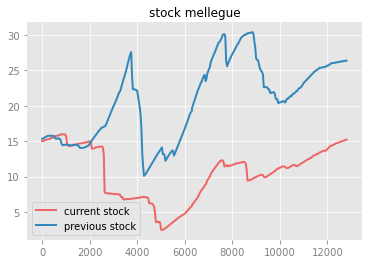

In [22]:
dfmellegue= df[df['station']=='mellegue']
print(dfmellegue)

stockmellegue= pd.DataFrame()
stockmellegue['current stock']=dfmellegue['stock']
stockmellegue['previous stock']=dfmellegue['stock_annee_prec']
print(stockmellegue)

stockmellegue.plot()


dfmellegue.to_csv('dfmellegue.csv')

plt.title('stock mellegue')
plt.savefig('dfmellegue.png')

In [23]:
x=["abid",'barbara','benmetir','bezirk','birmcherga','bouheurtma','chiba','elbrek','elhaouareb','gamgoum','ghezala','harka','hma','joumine','kasseb','kebir','lakhmess','lebna',
'masri','melah','mellegue','moula','nebhana','rmel','rmil','sarrat','sejnane','selbarrak','sficia',
'sidiach','sidisaad','sidisalem','siliana','tine','zarga','ziatine']

### Sidisaad

        station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
25     sidisaad     0.01          20     0.00  29.41                   0.04   
61     sidisaad     0.00          20     0.00  29.41                   0.02   
97     sidisaad     0.01          20     0.00  29.48                   0.02   
133    sidisaad     0.01          20     0.00  29.48                   0.01   
169    sidisaad     0.01          20     0.00  29.48                   0.34   
...         ...      ...         ...      ...    ...                    ...   
12691  sidisaad     0.04          20     0.03  57.19                   0.14   
12725  sidisaad     0.00          20     0.04  57.19                   0.10   
12759  sidisaad     0.05          20     0.04  57.29                   0.10   
12793  sidisaad     0.00          20     0.04  57.29                   0.04   
12827  sidisaad     0.04          20     0.03  57.39                   0.04   

       cumul_annuel_apports  cumul_mensuel_lachers 

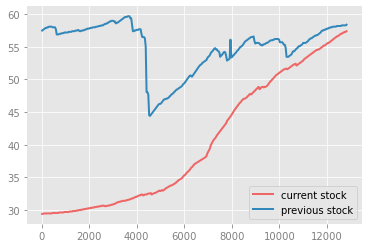

In [24]:
dfsidisaad= df[df['station']=='sidisaad']
print(dfsidisaad)

stocksidisaad= pd.DataFrame()
stocksidisaad['current stock']=dfsidisaad['stock']
stocksidisaad['previous stock']=dfsidisaad['stock_annee_prec']
print(stocksidisaad)

stocksidisaad.plot()

dfsidisaad.to_csv('dfsidisaad.csv')

### ELhaouareb

       current stock  previous stock
26              0.30            1.81
62              0.30            1.84
98              0.30            1.91
134             0.30            1.94
170             0.30            2.00
...              ...             ...
12692           1.56            0.57
12726           1.59            0.59
12760           1.63            0.68
12794           1.66            0.80
12828           1.72            0.89

[360 rows x 2 columns]


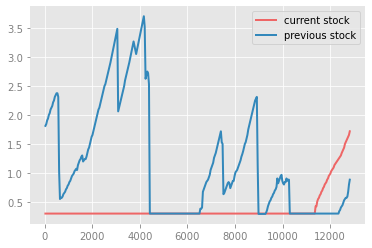

In [25]:
dfelhaouareb= df[df['station']=='elhaouareb']
dfelhaouareb

stockelhaouareb= pd.DataFrame()
stockelhaouareb['current stock']=dfelhaouareb['stock']
stockelhaouareb['previous stock']=dfelhaouareb['stock_annee_prec']
print(stockelhaouareb)

stockelhaouareb.plot()

dfelhaouareb.to_csv('dfelhaouareb.csv')